# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. Это задание будет не то чтобы про линейную регрессию, но про попытку построить модель для предсказания цен на дом. В принципе я бы мог еще добавить заданий на более тщательный отбор признаков, логарифмирование признаков, у которых сильное смещение "скоса"(skew). Можно было бы анализировать и выпрямлять распределение целевой переменной. Можно было бы генерировать новые признаки из существующих, строить ансамбли моделей. Но мы ограничимся, пока что.......

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, kurtosis
%matplotlib inline

In [4]:
df = pd.read_csv('data/house_prices.csv', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
assert df.shape == (1460, 80)

In [6]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание: 
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

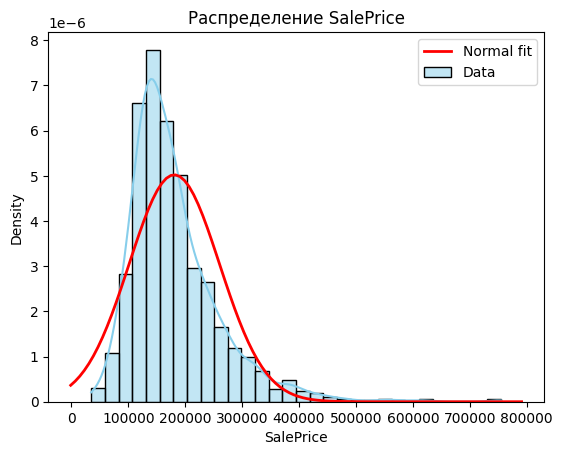

In [7]:
sns.histplot(df['SalePrice'], kde=True, stat="density", bins=30, color='skyblue', label='Data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, df['SalePrice'].mean(), df['SalePrice'].std())
plt.plot(x, p, 'r', linewidth=2, label='Normal fit')
plt.title('Распределение SalePrice')
plt.legend()
plt.show()

Коэффициент эксцесса (kurtosis) SalePrice: 6.51


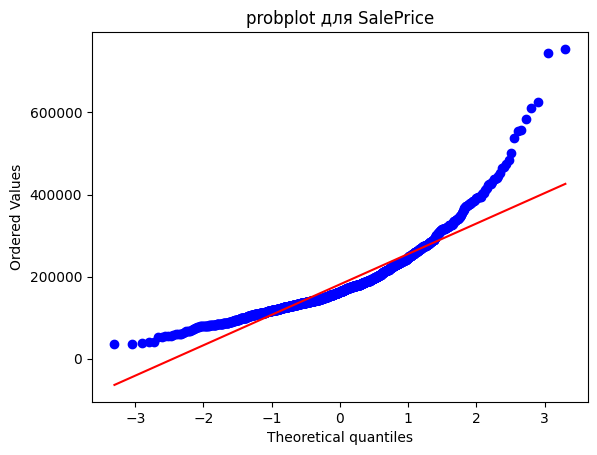

In [9]:
# Коэффициент эксцесса
kurt = kurtosis(df['SalePrice'])
print(f"Коэффициент эксцесса (kurtosis) SalePrice: {kurt:.2f}")

# График вероятностей
plt.figure()
stats.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title("probplot для SalePrice")
plt.show()

## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

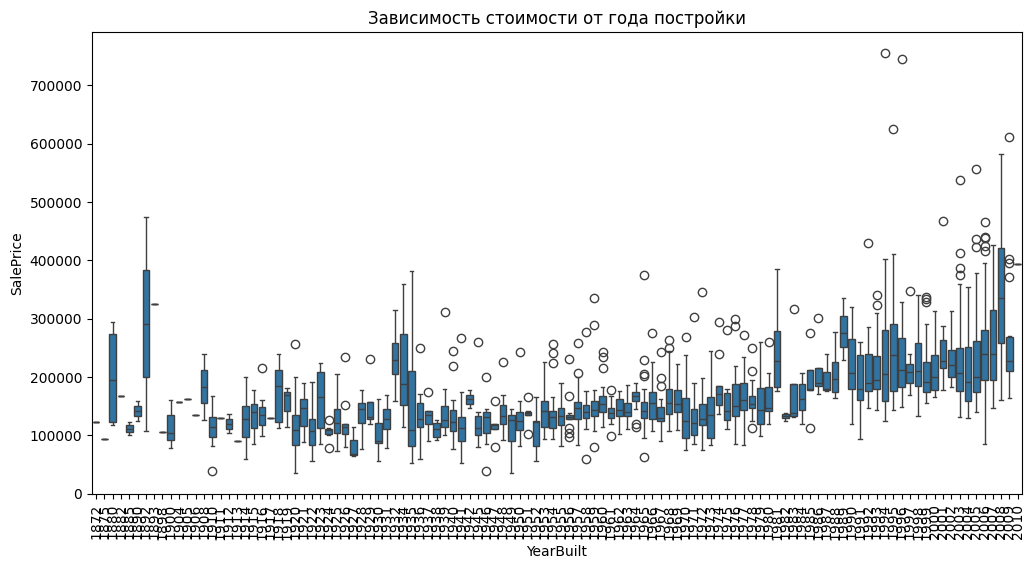

In [11]:

plt.figure(figsize=(12,6))
sns.boxplot(x='YearBuilt', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title('Зависимость стоимости от года постройки')
plt.show()

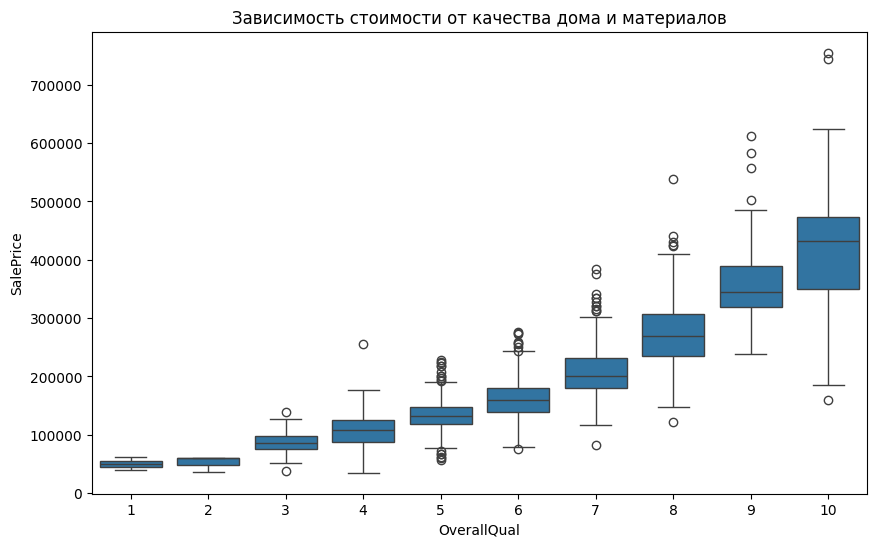

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Зависимость стоимости от качества дома и материалов')
plt.show()

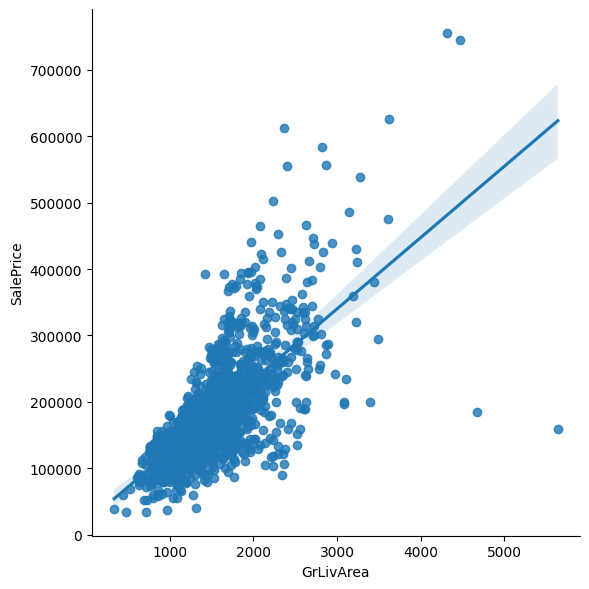

In [10]:
sns.lmplot(x='GrLivArea', y='SalePrice', data=df, height=6)

## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

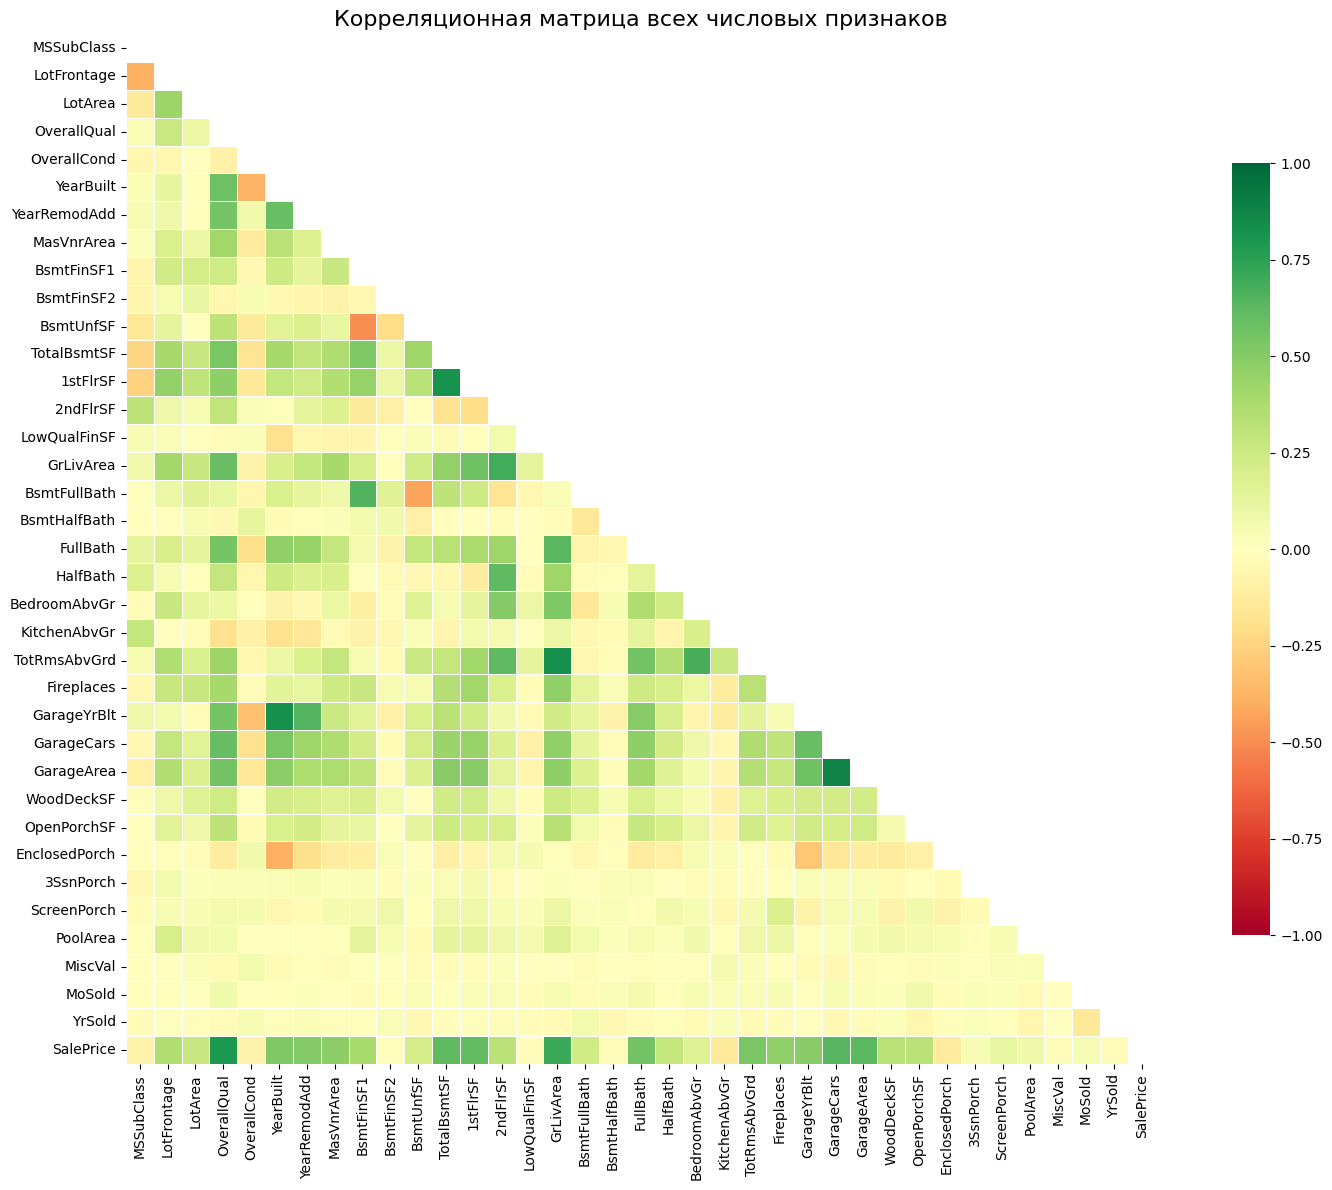

In [13]:
corrmat = df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, mask=mask, cmap='RdYlGn', vmax=1.0, vmin=-1.0, center=0, square=True, linewidths=0.5, annot=False, cbar_kws={"shrink": 0.75})
plt.title("Корреляционная матрица всех числовых признаков", fontsize=16)
plt.tight_layout()
plt.show()

Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной. 

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции. 
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

Сильно коррелирующие признаки с SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


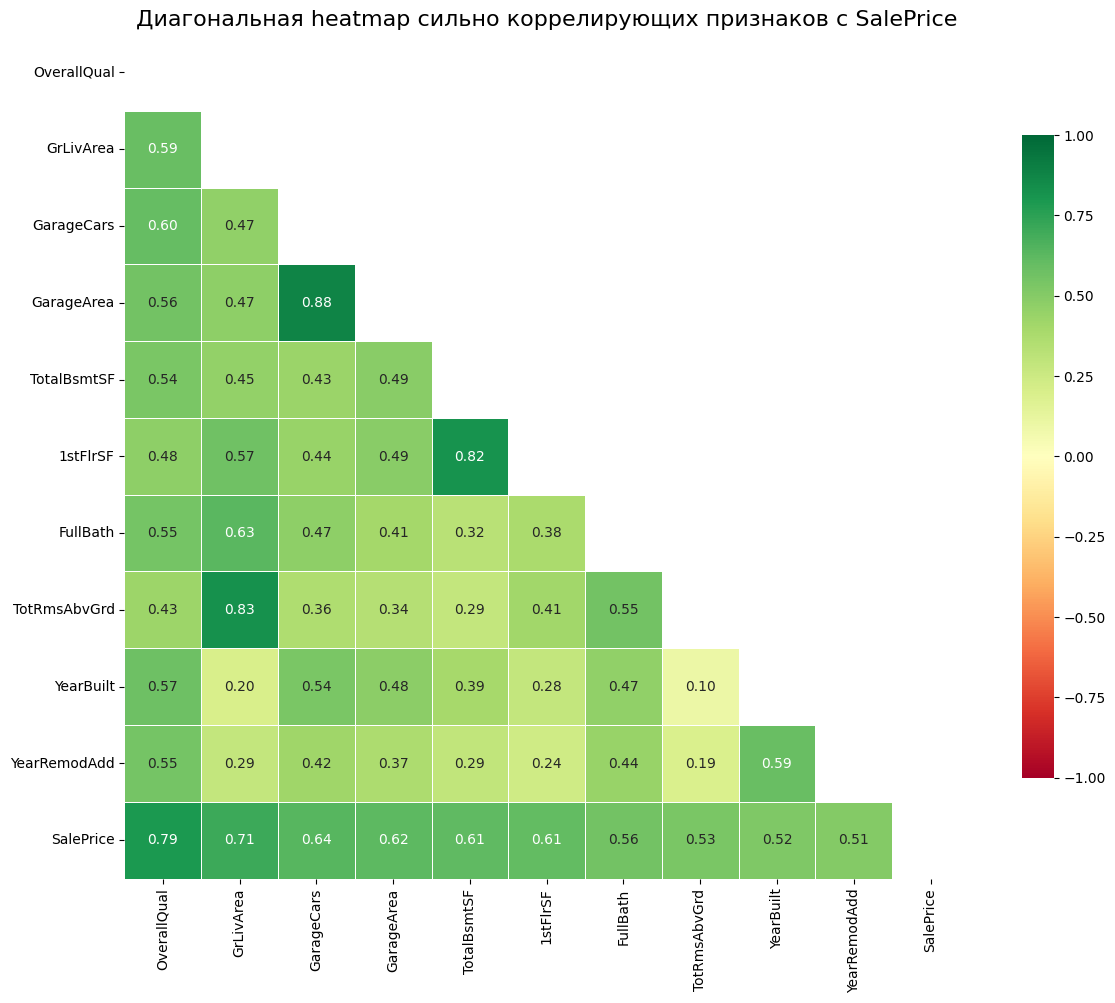

In [15]:
corrmat = df.corr(numeric_only=True)

strong_corr_features = corrmat['SalePrice'][abs(corrmat['SalePrice']) > 0.5].sort_values(ascending=False)
strong_corr_features = strong_corr_features.drop('SalePrice')

print("Сильно коррелирующие признаки с SalePrice:")
print(strong_corr_features)

selected_features = strong_corr_features.index.tolist() + ['SalePrice']
strong_corr_matrix = df[selected_features].corr()

mask = np.triu(np.ones_like(strong_corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    strong_corr_matrix,
    mask=mask,
    cmap='RdYlGn',
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
    vmax=1.0,
    vmin=-1.0,
    center=0
)

plt.title("Диагональная heatmap сильно коррелирующих признаков с SalePrice", fontsize=16)
plt.tight_layout()
plt.show()

## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [16]:
missing_count = df.isnull().sum()

missing_percent = missing_count / len(df)

missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent': missing_percent
})
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values(by='Missing Percent', ascending=False)

print("Признаки с пропущенными значениями:")
print(missing_data)

Признаки с пропущенными значениями:
              Missing Count  Missing Percent
PoolQC                 1453         0.995205
MiscFeature            1406         0.963014
Alley                  1369         0.937671
Fence                  1179         0.807534
MasVnrType              872         0.597260
FireplaceQu             690         0.472603
LotFrontage             259         0.177397
GarageType               81         0.055479
GarageYrBlt              81         0.055479
GarageFinish             81         0.055479
GarageQual               81         0.055479
GarageCond               81         0.055479
BsmtFinType2             38         0.026027
BsmtExposure             38         0.026027
BsmtFinType1             37         0.025342
BsmtCond                 37         0.025342
BsmtQual                 37         0.025342
MasVnrArea                8         0.005479
Electrical                1         0.000685


In [17]:
valid_features = missing_data[missing_data['Missing Percent'] <= 0.1].index.tolist()

df = df[valid_features + [col for col in df.columns if col not in missing_data.index]]

In [18]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna('unknown')

for col in df.select_dtypes(include='float').columns:
    df[col] = df[col].fillna(df[col].mean())

## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [19]:
df_encoded = pd.get_dummies(df, drop_first=True)

print(f"Количество признаков после one-hot encoding: {df_encoded.shape[1]}")

Количество признаков после one-hot encoding: 239


In [20]:
y = df_encoded['SalePrice']

X = df_encoded.drop('SalePrice', axis=1)

## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [22]:
coefficients = model.coef_
feature_names = X.columns

coef_list = list(zip(feature_names, coefficients))
coef_list_sorted = sorted(coef_list, key=lambda x: abs(x[1]))

print("Коэффициенты признаков (отсортированы по модулю):")
for feature, coef in coef_list_sorted:
    print(f"{feature:40s}: {coef:.2f}")

Коэффициенты признаков (отсортированы по модулю):
MiscVal                                 : 0.12
LotArea                                 : 0.76
BsmtUnfSF                               : -1.92
OpenPorchSF                             : 2.53
EnclosedPorch                           : 4.41
BsmtFinSF2                              : 7.02
WoodDeckSF                              : 13.41
MasVnrArea                              : 13.43
1stFlrSF                                : 15.37
BsmtFinSF1                              : 17.42
GarageArea                              : 18.38
LowQualFinSF                            : -19.53
MSSubClass                              : -19.79
TotalBsmtSF                             : 22.52
ScreenPorch                             : 28.59
GarageYrBlt                             : -30.18
GrLivArea                               : 31.15
3SsnPorch                               : 31.41
2ndFlrSF                                : 35.32
CentralAir_Y                            

In [23]:
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

mse_scores = -neg_mse_scores
mean_mse = mse_scores.mean()

print(f"\nСреднее MSE на 5 фолдах: {mean_mse:.2f}")


Среднее MSE на 5 фолдах: 2020713369.74


К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [24]:
from sklearn.linear_model import Lasso, Ridge

alphas = np.linspace(1, 500, 30)

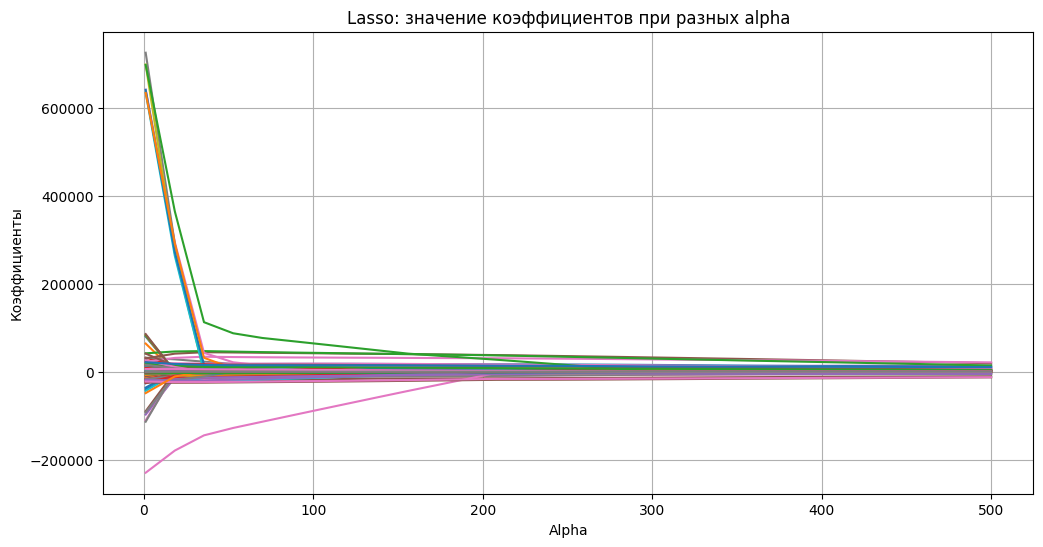

In [25]:
lasso_coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X, y)
    lasso_coefs.append(lasso.coef_)

lasso_coefs = np.array(lasso_coefs).T

plt.figure(figsize=(12, 6))
for coef in lasso_coefs:
    plt.plot(alphas, coef)
plt.title("Lasso: значение коэффициентов при разных alpha")
plt.xlabel("Alpha")
plt.ylabel("Коэффициенты")
plt.grid(True)
plt.show()

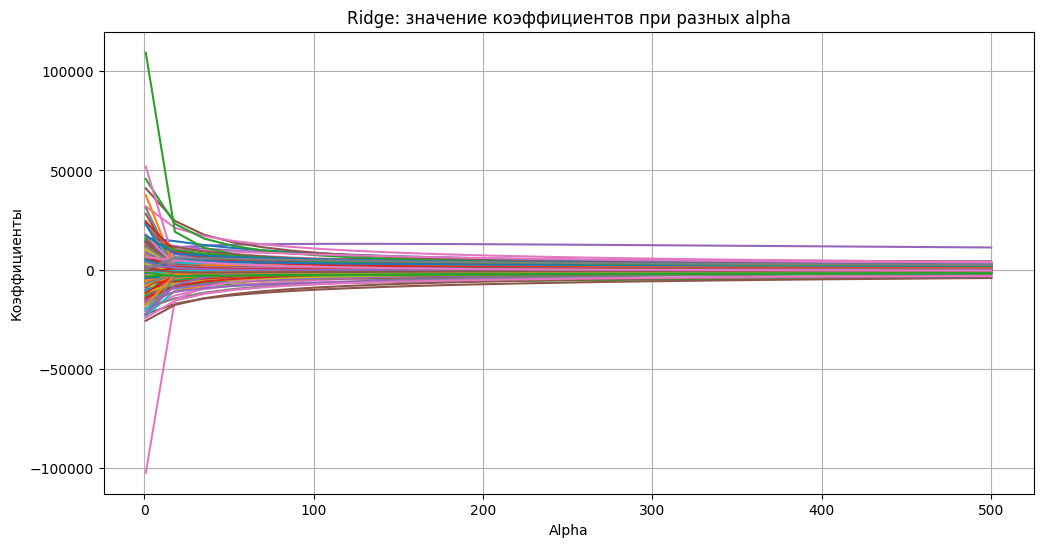

In [26]:
ridge_coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

ridge_coefs = np.array(ridge_coefs).T

plt.figure(figsize=(12, 6))
for coef in ridge_coefs:
    plt.plot(alphas, coef)
plt.title("Ridge: значение коэффициентов при разных alpha")
plt.xlabel("Alpha")
plt.ylabel("Коэффициенты")
plt.grid(True)
plt.show()

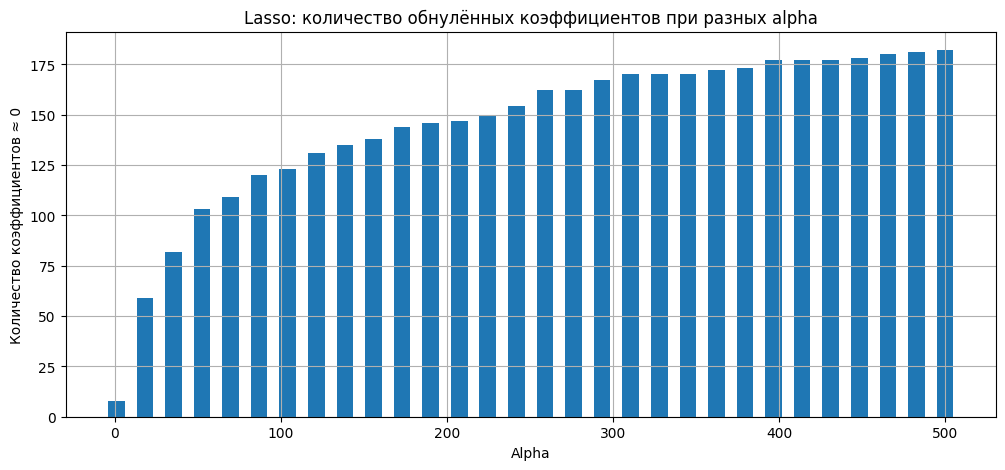

In [27]:
zero_counts = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X, y)
    zero_count = np.sum(np.abs(lasso.coef_) < 0.0001)
    zero_counts.append(zero_count)

plt.figure(figsize=(12, 5))
plt.bar(alphas, zero_counts, width=10)
plt.title("Lasso: количество обнулённых коэффициентов при разных alpha")
plt.xlabel("Alpha")
plt.ylabel("Количество коэффициентов ≈ 0")
plt.grid(True)
plt.show()

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

In [28]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5, max_iter=10000)
lasso_cv.fit(X, y)

print(f"Оптимальное значение alpha: {lasso_cv.alpha_}")

Оптимальное значение alpha: 209067.7746829921


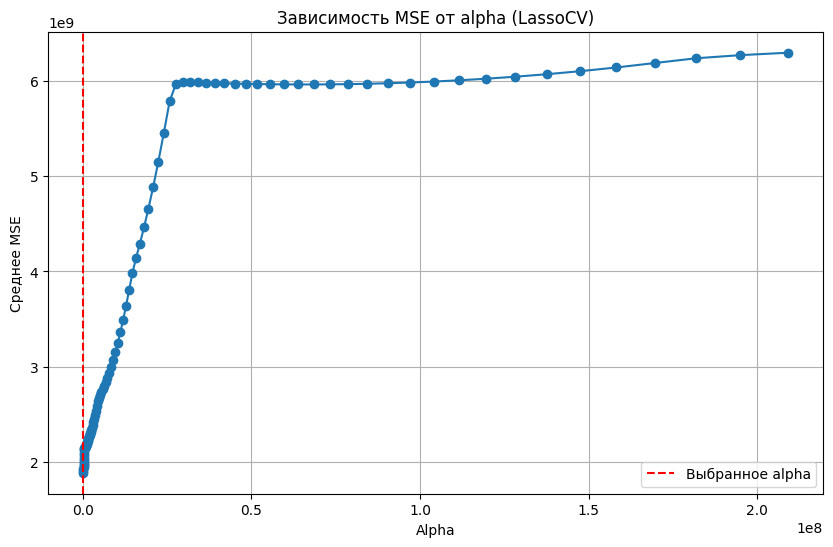

In [29]:
import matplotlib.pyplot as plt
import numpy as np

mse_mean = np.mean(lasso_cv.mse_path_, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, mse_mean, marker='o')
plt.axvline(lasso_cv.alpha_, color='r', linestyle='--', label='Выбранное alpha')
plt.xlabel("Alpha")
plt.ylabel("Среднее MSE")
plt.title("Зависимость MSE от alpha (LassoCV)")
plt.legend()
plt.grid(True)
plt.show()

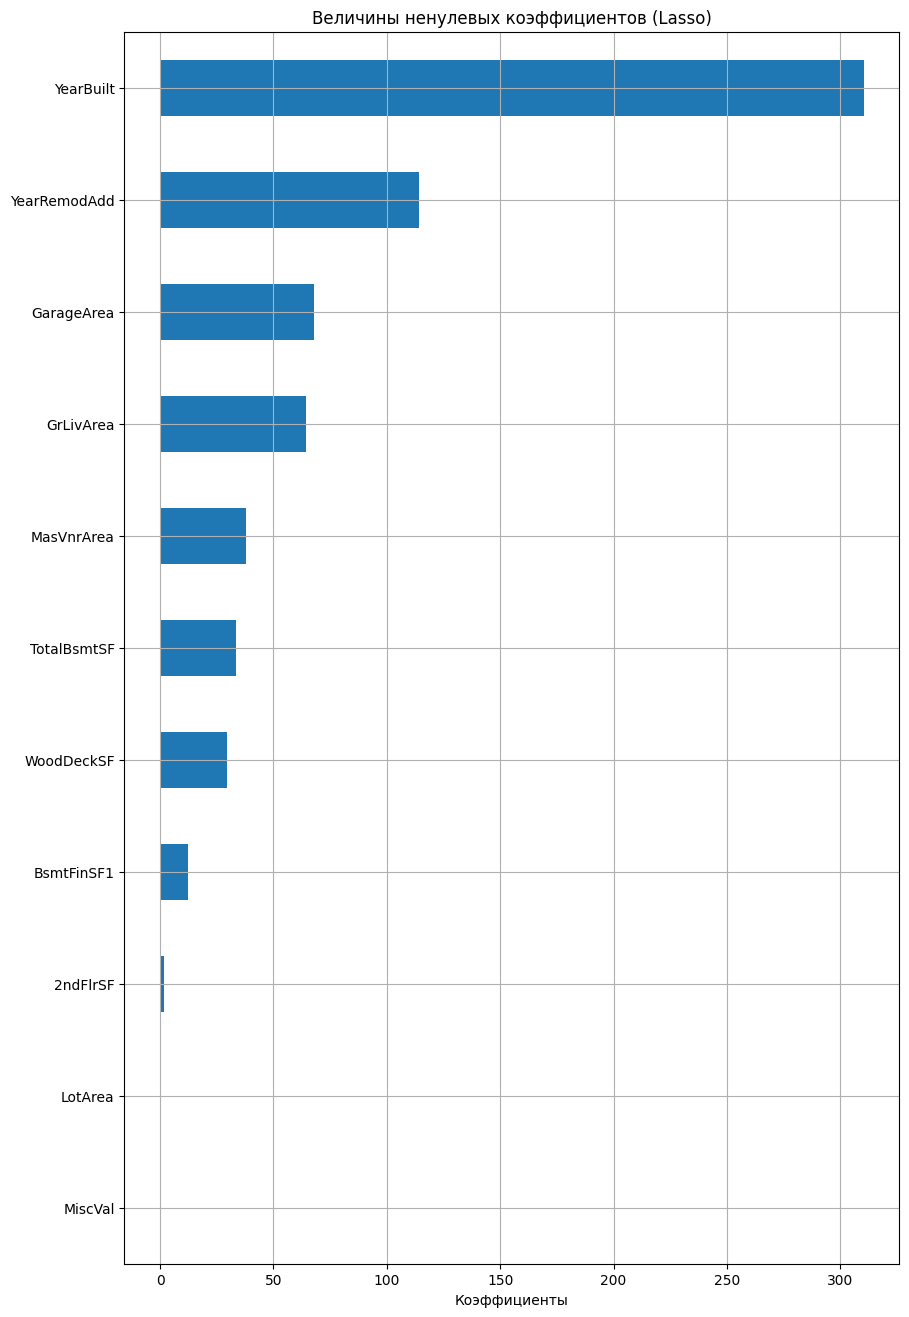

Количество ненулевых признаков: 11


In [30]:
import pandas as pd

coef_series = pd.Series(lasso_cv.coef_, index=X.columns)

non_zero_coefs = coef_series[coef_series.abs() > 1e-4]
non_zero_sorted = non_zero_coefs.sort_values()

plt.figure(figsize=(10, 16))
non_zero_sorted.plot(kind='barh')
plt.title("Величины ненулевых коэффициентов (Lasso)")
plt.xlabel("Коэффициенты")
plt.grid(True)
plt.show()

print(f"Количество ненулевых признаков: {len(non_zero_sorted)}")

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lasso_cv, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
print(f"Средняя MSE по 5 фолдам: {mse_scores.mean():.2f}")

Средняя MSE по 5 фолдам: 1885755296.86


## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

print(f"Размерность X_train: {X_train.shape}")
print(f"Размерность X_test: {X_test.shape}")

Размерность X_train: (978, 238)
Размерность X_test: (482, 238)


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

In [33]:
lasso_cv.fit(X_train, y_train)

y_pred = lasso_cv.predict(X_test)

print(f"Прогнозируемые значения для первых 10 примеров: {y_pred[:10]}")

Прогнозируемые значения для первых 10 примеров: [137821.49861359 299490.85168573 112926.60117563 163204.86328574
 256174.0072607   71125.67105416 192352.15896976 160234.05825968
  67109.56882383 143594.4474886 ]


Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

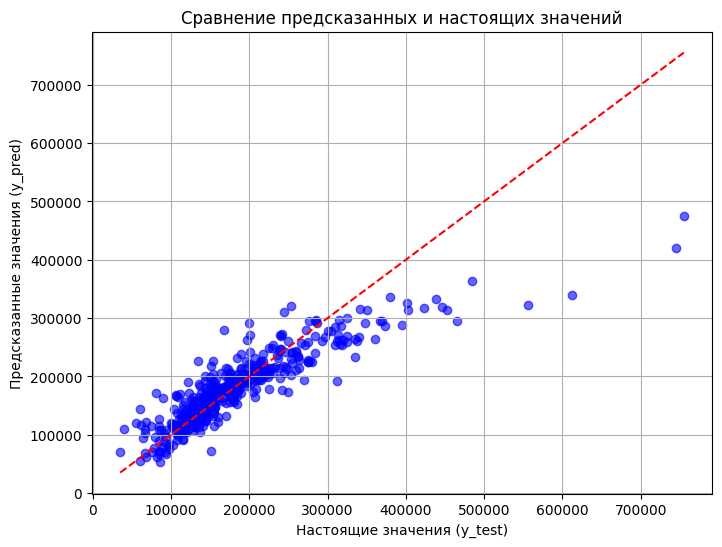

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')  # Идеальная линия
plt.xlabel("Настоящие значения (y_test)")
plt.ylabel("Предсказанные значения (y_pred)")
plt.title("Сравнение предсказанных и настоящих значений")
plt.grid(True)
plt.show()

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [35]:
lasso = Lasso(alpha=1)

cv_scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse = -cv_scores.mean()

print(f"Средняя ошибка (MSE) на 5 фолдах: {mean_mse}")

c:\Users\Сергей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.541e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\Сергей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.269e+11, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\Сергей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

Средняя ошибка (MSE) на 5 фолдах: 1942408433.2863972


c:\Users\Сергей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.429e+11, tolerance: 7.249e+08
  model = cd_fast.enet_coordinate_descent(


Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.